In [1]:

import sys
sys.path.append("../")

import cubespa

import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Loading in Data

To being using CubeSPA, simply load in the filename of your datacube.

To load in **moment maps**, simply supply the path+filename prefix from a `maskmoment` output, and things will be automatically loaded in.

To load in any additional images, simply use `load_data()` on the individual filenames, and append them to `additional_maps`. Any RGB objects (such as HST images), can be sliced for simplicity by specifying `rgb_index`

In [2]:
cube_fn = "../../Jellyfish/Projects/ALMA_PROCESSING/4kms/NGC4858_Combined_CO_cube_4kms.image.pbcor.fits"
mm_topdir = "../../Jellyfish/Projects/ALMA_PROCESSING/4kms/NGC4858_4kms.4.0_3.0"

halpha_fn = "../../Jellyfish/DATA/SUPRIME_CAM/stampdiff_GMP3816.fits"
hst_fn = "../../Jellyfish/DATA/HST/color_hst_13777_02_wfc3_uvis_f600lp_f350lp_sci.fits"

stellar_ra, stellar_dec = 194.75871125601466, 28.115690196322245
pa = 30

c = cubespa.CubeSPA(cube_fn, mom_maps=mm_topdir, limits="auto", 
                    additional_maps=[])
#c.center = center=cubespa.centre_coords(c.cube.wcs, stellar_ra, stellar_dec)





halpha = cubespa.load_data(halpha_fn, label="HALPHA")
halpha_interp = cubespa.align_image(c.mom_maps.mom0, halpha)

hst = cubespa.load_data(hst_fn, label="HST")
hst_interp = cubespa.align_image(c.mom_maps.mom0, hst)


c.additional_maps.extend([halpha_interp, hst_interp])



# Generate Cutouts

Cutouts can be made simply by specifying the central position and size (which can either be an int or tuple). You can check the size/shape of the cutouts by setting `show_bbox` to True.

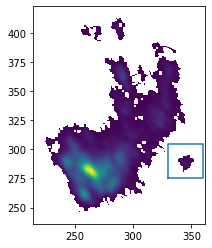

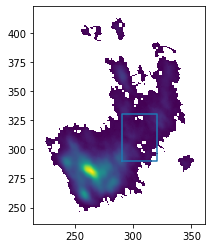

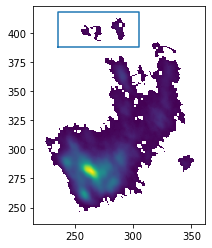

In [3]:

blob = cubespa.gen_cutout(c, (345, 290), 15, show_bbox=True)
fallback = cubespa.gen_cutout(c, (305, 310), (20, 15), show_bbox=True)
outskirts = cubespa.gen_cutout(c, (270, 403), (15, 35), show_bbox=True)



# Generate Moment Maps

Using the built-in `CubeSPA.plot_moment_maps()` function, you can immediately see what your moment maps look like with no guesswork.

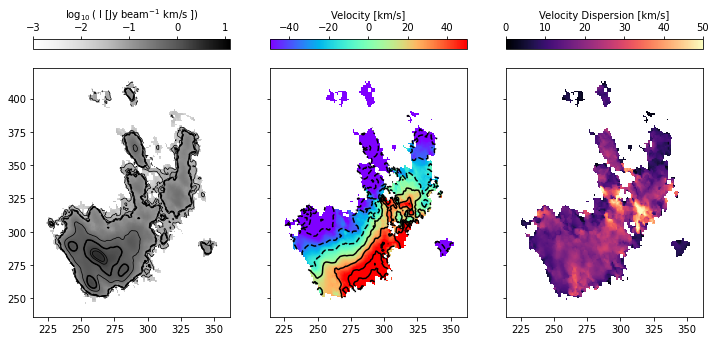

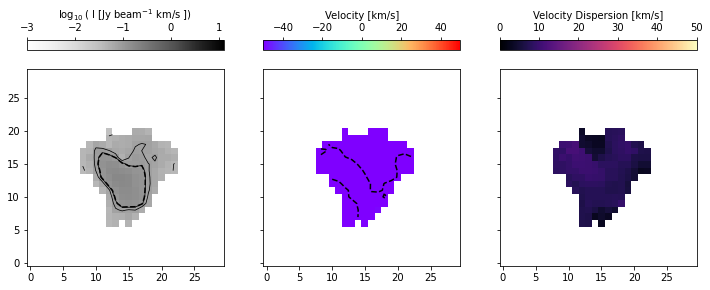

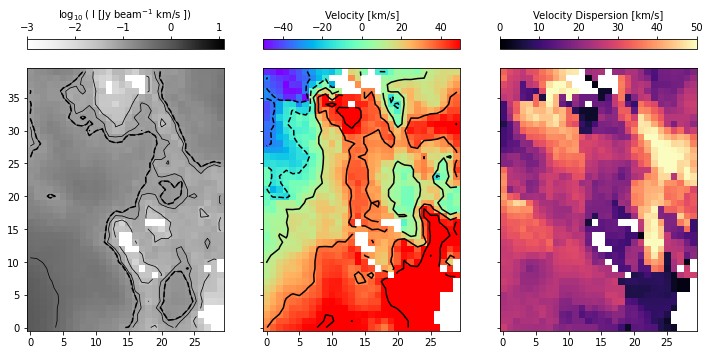

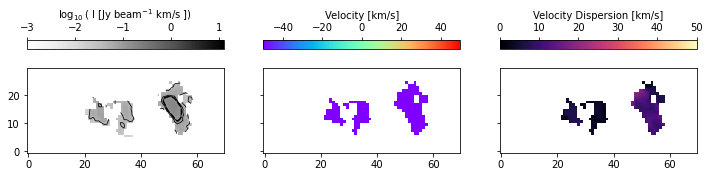

In [4]:
c.plot_moment_maps()

blob.plot_moment_maps(use_limits=False)
fallback.plot_moment_maps(use_limits=False,)
outskirts.plot_moment_maps(use_limits=False)


# Generate Spectra

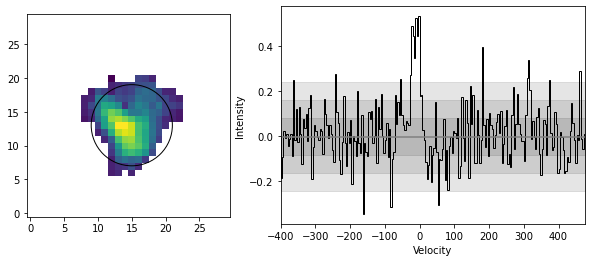

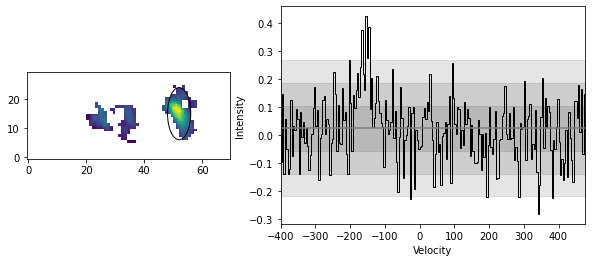

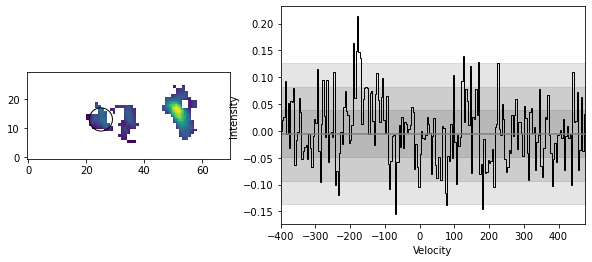

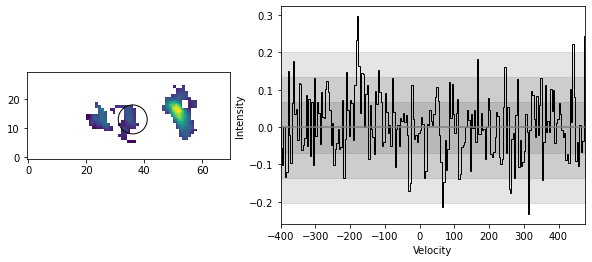

In [5]:

blob.create_spectra((15, 13), (6, 6), plot=True)
outskirts.create_spectra((52, 15), (4, 9), plot=True)
outskirts.create_spectra((25, 13), (4, 4), plot=True)
outskirts.create_spectra((36, 13), (5, 5), plot=True)


# Overlays

Using CubeSPA, you can seamlessly create overlay plots of a full cube map and cutout maps alike.

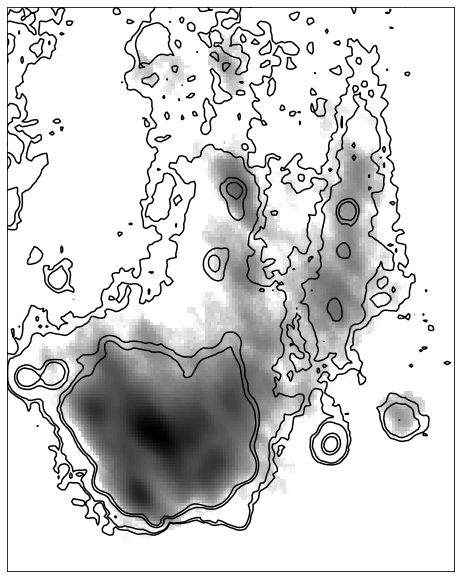

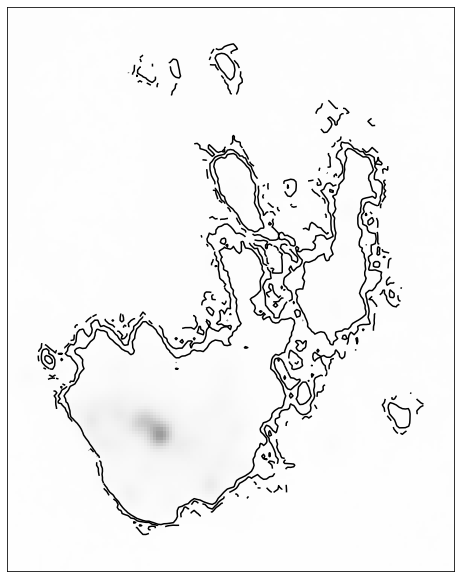

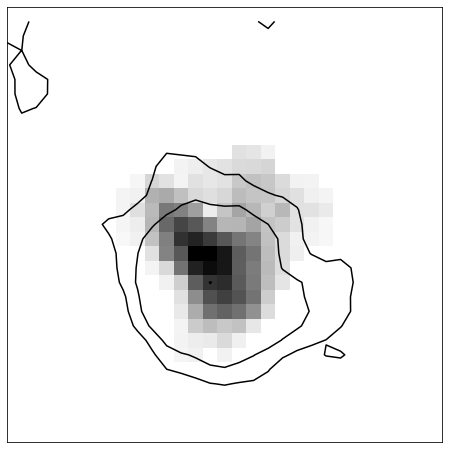

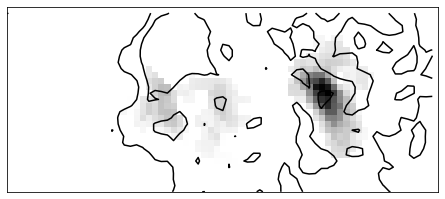

In [6]:

cubespa.plotting.overlay_plot(c.mom_maps.mom0, c.additional_maps[0], lims=c.limits, levels=[10, 20, 100, 150],
                              log_img=True)


cubespa.plotting.overlay_plot(c.additional_maps[0], c.mom_maps.mom0, lims=c.limits, levels=[0.02, 0.05, 0.1])


cubespa.plotting.overlay_plot(blob.mom_maps.mom0, blob.additional_maps[0], levels=[10, 20, 100, 150])
cubespa.plotting.overlay_plot(outskirts.mom_maps.mom0, outskirts.additional_maps[0], levels=[10, 20, 100, 150])



# PVDs


To generate PVDs, simply supply the cube , the central PVD location and length, and the position angle


(220, 25)


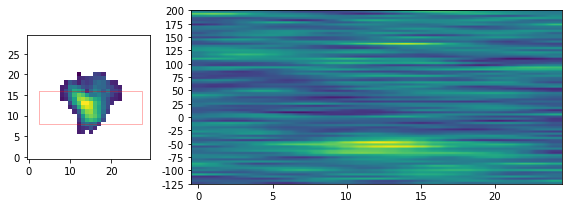


(220, 50)


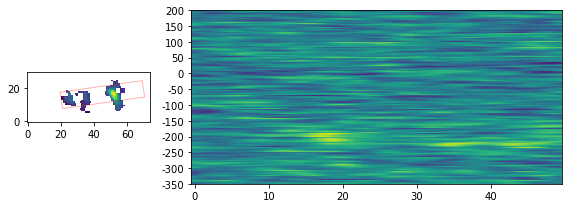

In [7]:

pvd = cubespa.gen_pvd(blob, (15, 12), 25, 0, width=8)
cubespa.plotting.pvd_plot(blob, pvd, vmin=-125)


pvd = cubespa.gen_pvd(outskirts, (45, 16), 50, 8, width=10)
cubespa.plotting.pvd_plot(outskirts, pvd, vmin=-350, vstep=50)

# Channel Maps

To create channel maps, simply specify the number of channels, and the velocity range

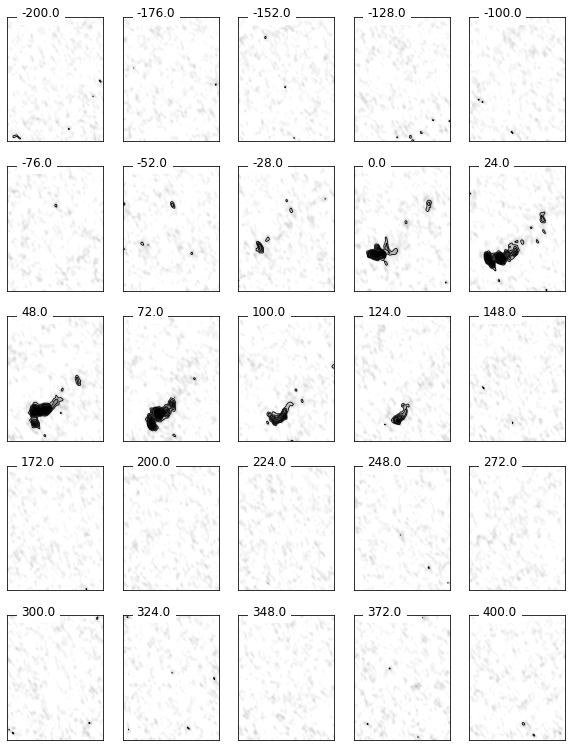

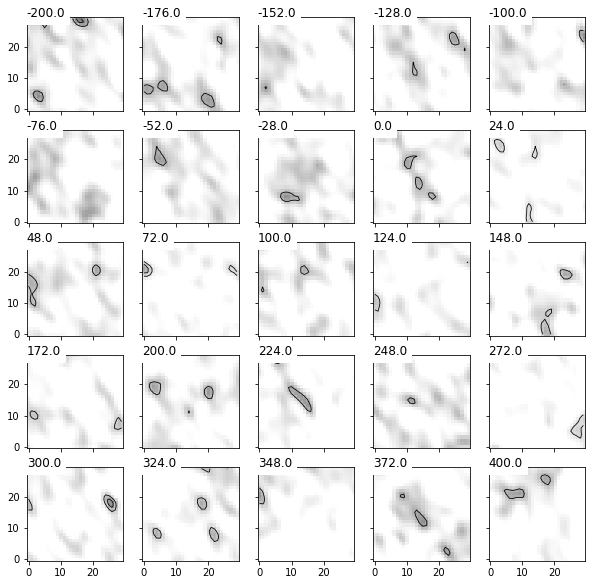

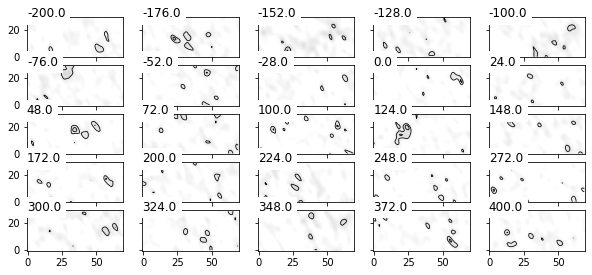

In [8]:

cubespa.plotting.channel_maps(c, vmin=0, vmax=0.02, limits=c.limits, show_ticks=False, cmap="Greys", colors="black")
cubespa.plotting.channel_maps(blob, vmin=0, vmax=0.01)
cubespa.plotting.channel_maps(outskirts)


# Normalizing, Plotting, and Overlays with RGB Images

To Work with RGB images (such as HST images), we can create a simple alignment using `align_image`. Generally, the RGB plotting in matplotlib requires tweaking, so the user can use `normalized_rgb_image` to adjust the stretches on the 3 images. Once the RGB image is properly normalized, we can use the plotting functions `plot_rgb` or `rgb_overlay` to either display the RGB image or create overlays with it.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


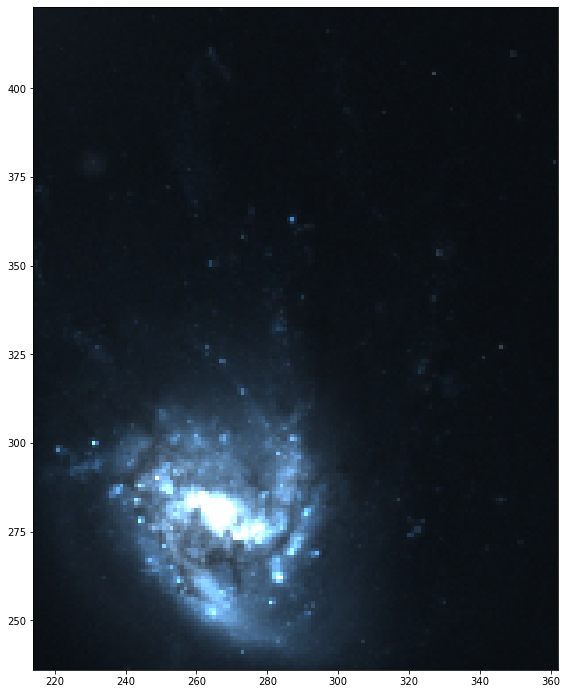

In [9]:
hst = cubespa.load_data(hst_fn, rgb_index=None, label="HST")
hst_interp = cubespa.align_image(c.mom_maps.mom0, hst)

test = hst_interp.data.transpose(1,2,0)

cubespa.plotting.plot_rgb(test, lims=np.array(c.limits), outname="./rgb_nonorm.png")

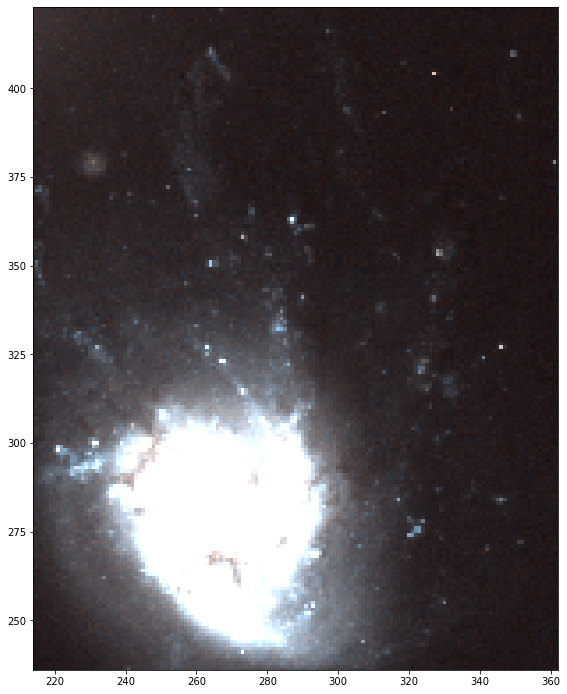

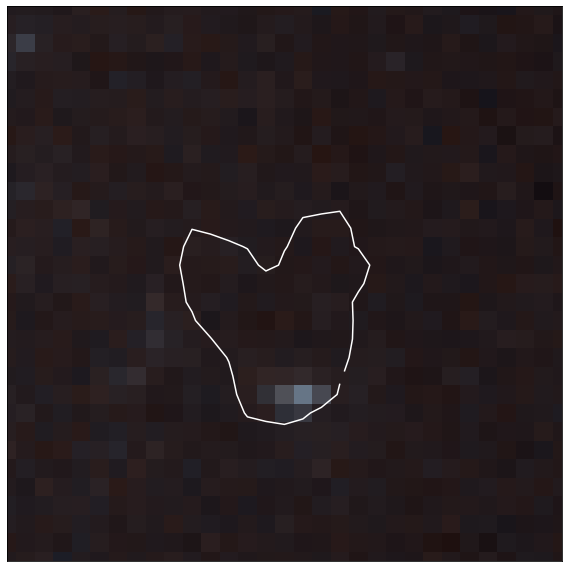

In [20]:
norm = cubespa.normalized_rgb_image(hst_interp.data, sigma = (1,1))

cubespa.plotting.plot_rgb(norm, lims=np.array(c.limits))
cubespa.plotting.rgb_overlay(norm, c.mom_maps.mom0, levels=[ 0.07, 1], lims=blob.limits, colors="white")


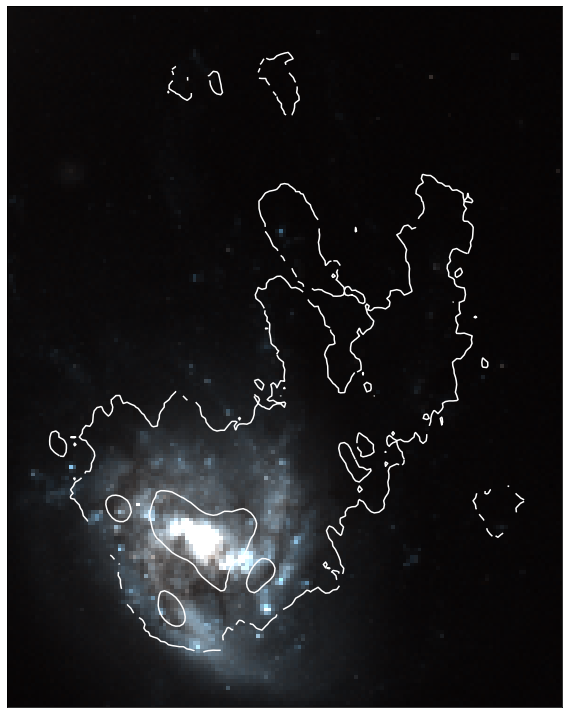

In [32]:
norm = cubespa.normalized_rgb_image(hst_interp.data, sigma = (1, 5))

cubespa.plotting.rgb_overlay(norm, c.mom_maps.mom0, levels=[0.05, 1], lims=c.limits, colors="white")